# Pretrained Model을 활용하여 이미지 분류하기

참고) https://pytorch.org/docs/stable/torchvision/models.html

Pretrained Model은 ImageNet과 같은 대규모 이미지 데이터 세트에 대해 훈련된 신경망 모형이다. 

![ex_screenshot](images/Model_Timeline.png)

TorchVision을 사용하여 imagenet으로 사전 훈련된 모형을 로드할 수 있다.

In [2]:
from torchvision import models
import torch

#torchvision 모듈 에서 사용 가능한 다른 모델 확인
dir(models)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 'squeezenet1_1',
 'utils',
 'vgg',
 'vgg11',
 'vgg11_bn',
 'vgg13',
 'vgg13_bn',
 'vgg16',
 'vg

### 모형의 비교
![ex_screenshot](images/Pre-Trained-Model-Comparison.png)

### 1 단계 : 사전 훈련 된 모델로드
일반적으로 PyTorch 모델의 확장자는 .pt 또는 .pth 이다.
가중치가 다운로드되면 다음과 같이 네트워크 아키텍처에 대한 세부 정보를 확인할 수도 있다.
모델은 'TORCH_HOME'으로 지정된 디렉토리에 다운로드 된다.

In [1]:
import os
# 모형이 다운로드 될 디렉토리를 지정
os.environ['TORCH_HOME'] = '../models'

In [3]:
resnet18 = models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to ../models\checkpoints\resnet18-5c106cde.pth


In [4]:
print(resnet18)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

### 2 단계 : 이미지 변환 지정
모델을 가지고 나면 다음 단계는 입력 이미지를 올바른 모양과 평균 및 표준 편차와 같은 다른 특성을 갖도록 변환한다.

In [5]:
from torchvision import transforms
transform = transforms.Compose([            #[1] 입력 이미지에서 수행 될 모든 이미지 변환의 조합
 transforms.Resize(256),                    #[2] 이미지 크기를 256 × 256 픽셀로 조정
 transforms.CenterCrop(224),                #[3] 이미지를 중심을 기준으로 224 × 224 픽셀로 자름
 transforms.ToTensor(),                     #[4] 이미지를 PyTorch Tensor 데이터 유형으로 변환
 transforms.Normalize(                      #[5] 평균 및 표준 편차를 지정된 값으로 설정하여 이미지를 정규화
 mean=[0.485, 0.456, 0.406],                #[6] 계산된 평균
 std=[0.229, 0.224, 0.225]                  #[7] 계산된 표준 편차
 )])

### 3 단계 : 입력 이미지로드 및 전처리
입력 이미지를 로드하고 위에서 지정한 이미지 변환을 수행한다.

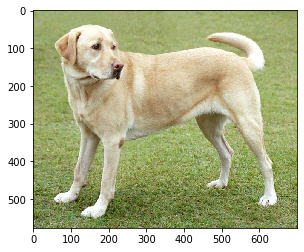

In [1]:
# Import Pillow
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

img = Image.open("images/Labrador.jpg")

plt.imshow(img)

In [7]:
# 해당 이미지를 입력에 맞는 형태로 transform 한다.
img_t = transform(img)
batch_t = torch.unsqueeze(img_t, 0)

### 4 단계 : 모델 추론
마지막으로 사전 훈련 된 모델을 사용하여 모델이 이미지를 어떻게 예측하는지 확인한다.

먼저 모델을 평가 모드로 설정 해야 한다.

In [8]:
resnet18.eval()

out = resnet18(batch_t)
print(out.shape)

torch.Size([1, 1000])


**이미지의 클래스 (또는 레이블)**  

이미지의 클래스 (또는 레이블)이 없다. 이를 위해 먼저 1000 개의 레이블이 모두있는 텍스트 파일에서 레이블을 읽고 저장한다.

In [9]:
with open('imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

예측값 중 score가 가장 높은 1개를 출력한다.

In [10]:
_, index = torch.max(out, 1)

percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100

print(labels[index[0]], percentage[index[0]].item())

208, Labrador_retriever 70.66324615478516


예측 값 중 가장 높은 상위 5개를 출력한다.

In [11]:
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('208, Labrador_retriever', 70.66324615478516),
 ('207, golden_retriever', 4.95659065246582),
 ('209, Chesapeake_Bay_retriever', 4.195658206939697),
 ('176, Saluki', 4.1415324211120605),
 ('243, bull_mastiff', 2.659818410873413)]